In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
wine=pd.read_csv("winequality-red.csv")

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine.shape

(1599, 12)

In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

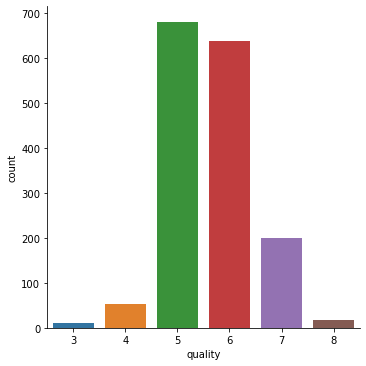

In [8]:
sns.catplot(x='quality',data=wine,kind='count')

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

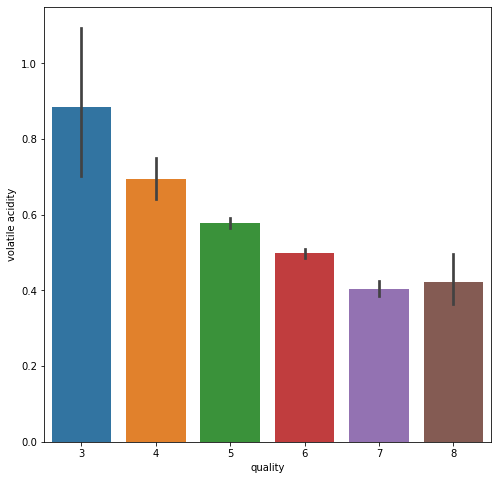

In [9]:
plot=plt.figure(figsize=(8,8))
sns.barplot(x='quality',y='volatile acidity',data=wine)

# high the value of volatile acidity low will be the quality of the wine

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

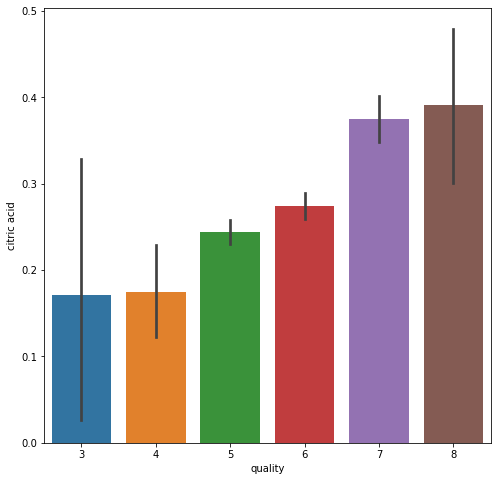

In [10]:
plot=plt.figure(figsize=(8,8))
sns.barplot(x='quality',y='citric acid',data=wine)

# More the citric acid then the quality of the wine will be great

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

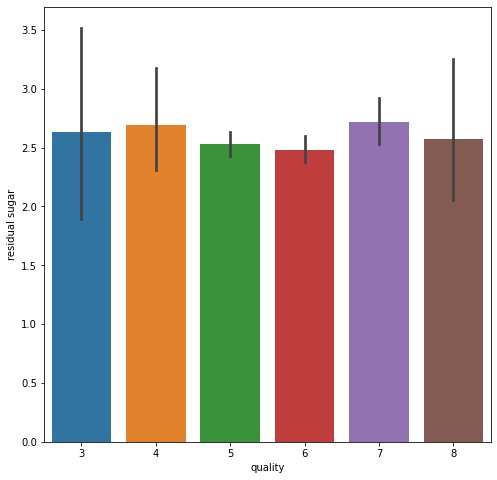

In [11]:
plot=plt.figure(figsize=(8,8))
sns.barplot(x='quality',y='residual sugar',data=wine)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

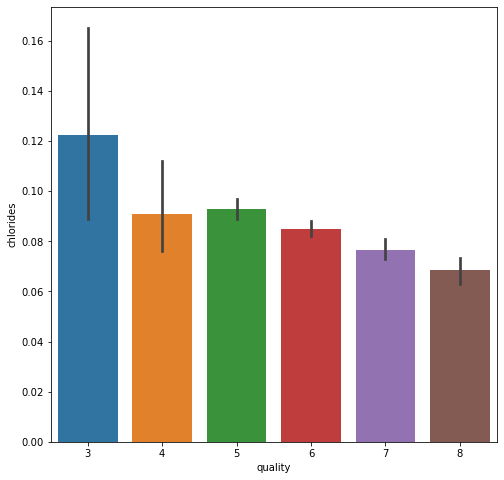

In [12]:
plot=plt.figure(figsize=(8,8))
sns.barplot(x='quality',y='chlorides',data=wine)

<AxesSubplot:>

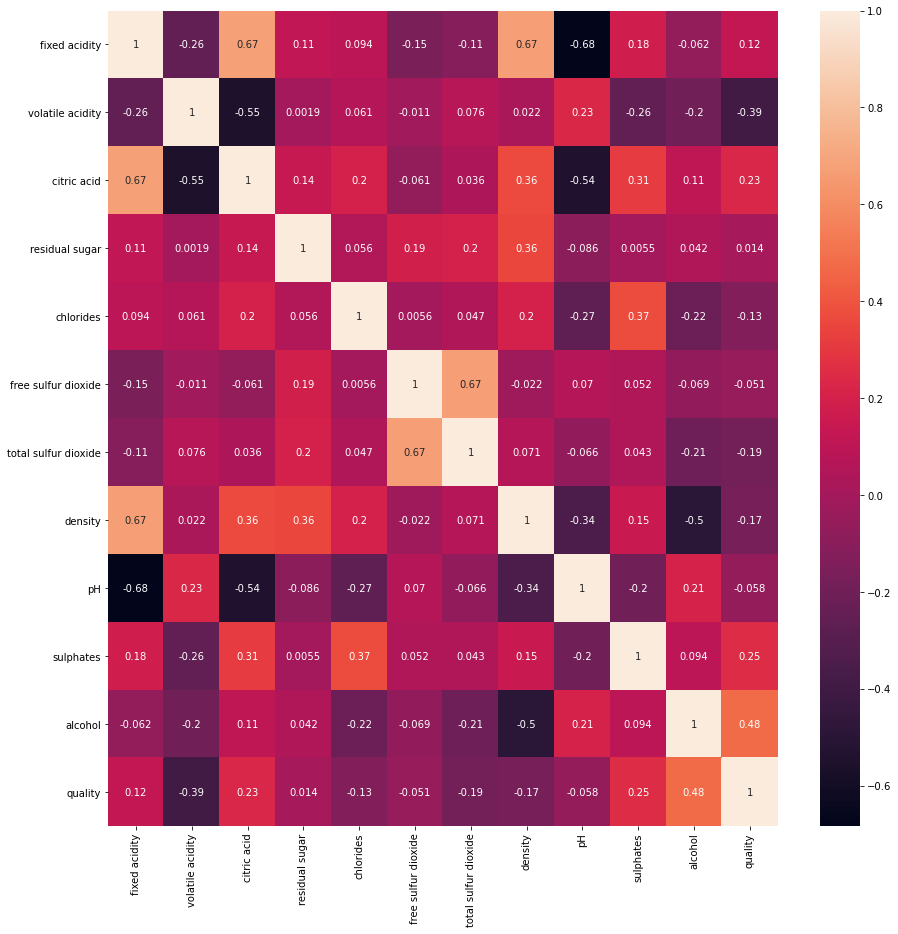

In [13]:
correlation=wine.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation,annot=True)

In [14]:
X=wine.drop(['quality'],axis=1)
y=wine['quality'].apply(lambda y_value: 1 if  y_value>=7 else 0)

In [15]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [16]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: quality, dtype: int64

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)

In [18]:
X_train.shape

(1279, 11)

In [19]:
X_test.shape

(320, 11)

In [20]:
X.shape

(1599, 11)

In [21]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
X_train_prediction=rf.predict(X_train)
X_train_acc=accuracy_score(X_train_prediction,y_train)
print(X_train_acc)

1.0


In [22]:
X_test_prediction=rf.predict(X_test)
X_test_acc=accuracy_score(X_test_prediction,y_test)
print(X_test_acc)

0.93125


In [23]:
input_data=(7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5)
input_data_as_np_array=np.asarray(input_data)
input_dat_reshaped=input_data_as_np_array.reshape(1,-1)
prediction=rf.predict(input_dat_reshaped)
#print(prediction)
if prediction[0]==0:
    print("The quality of the wine is bad")
else:
     print("The quality of the wine is Good")

The quality of the wine is bad
